In [3]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Analyzing the dataset - 'BoxOfficeCollections.csv'
#Load the csv file
df = pd.read_csv('BoxOfficeCollections_raw.csv')

#We print the first five records of df using the df.head() function
print(df.head())

print('\n\nInformation of the dataset:\n')
print(df.info())


                  Movie  Year  Score  Adjusted Score             Director  \
0               Hot Rod  2007     39          42.918       Akiva Schaffer   
1            Game Night  2018     85          99.838   John Francis Daley   
2  The First Wives Club  1996     49          53.174          Hugh Wilson   
3           Scary Movie  2000     52          54.973  Keenen Ivory Wayans   
4              Blockers  2018     84          96.883           Kay Cannon   

                                                Cast  \
0  Andy Samberg, Jorma Taccone, Bill Hader, Danny...   
1  Jason Bateman, Rachel McAdams, Kyle Chandler, ...   
2  Goldie Hawn, Bette Midler, Diane Keaton, Maggi...   
3  Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...   
4  Leslie Mann, Ike Barinholtz, John Cena, Kathry...   

                                           Consensus  Box Office Collection  \
0  For Rod Kimball (Andy Samberg), performing stu...             14371564.0   
1  Max and Annie's weekly game night gets 

In [ ]:
#core data cleaning steps
print("-------------------------------Core cleaning steps-----------------------------------")
# Checking for missing values
print("-------------------------------Checking for missing values-----------------------------------")
print(df.isnull().sum())
print("-------------------------------Checking num of duplicate rows -------------------------")
#Checking for duplicate rows
print(df.duplicated().sum())
#print column names of the dataframe
print("-------------------------------Column names -------------------------------")
for col in df.columns:
    print(col)
#cheaning the column names
print("-----------------------------Cheaning the column names-----------------------------------")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in df.columns:
    print(col)
#Viewing data types of all columns.
print("-----------------------------Viewing data types of all columns-----------------------------")
print(df.dtypes)

In [3]:
print("----------------------------------Count null values in each row--------------------------------")
# Count null values in each row
null_counts = df.isnull().sum(axis=1)
print(null_counts)
# Find the maximum number of nulls in any row
max_null_count = null_counts.max()

print("--------------------print max_null_count in a row---------------------")
print("Maximum num of nulls in a row: ",max_null_count)

print("------------------Num of the rows containing maximum nulls------------------------")

# Filtering rows with the maximum number of nulls
rows_with_max_nulls = df[null_counts == max_null_count]
#print(rows_with_max_nulls)

#length of dataframe
row_count = len(rows_with_max_nulls)
print("Number of rows with maximum", max_null_count," null values:" ,row_count) 

print("\n--------------------drop the rows with maximum null values from the actual dataframe---------------------")

#drop the rows with maximum null values from the actual dataframe
df.drop(rows_with_max_nulls.index, inplace = True)
#print(df.tail())
print('num of rows now:', len(df))

----------------------------------Count null values in each row--------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
1373    7
1374    5
1375    6
1376    6
1377    7
Length: 1378, dtype: int64
--------------------print max_null_count in a row---------------------
Maximum num of nulls in a row:  7
------------------Num of the rows containing maximum nulls------------------------
Number of rows with maximum 7  null values: 11

--------------------drop the rows with maximum null values from the actual dataframe---------------------
num of rows now: 1367


In [4]:

#print info about df
print("------------------------------------info about df----------------------------------")
print(df.info())
print("------------------------------------null values in df----------------------------------")
print(df.isnull().sum())

------------------------------------info about df----------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1367 entries, 0 to 1376
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie                  1367 non-null   object 
 1   year                   1367 non-null   int64  
 2   score                  1367 non-null   int64  
 3   adjusted_score         1367 non-null   float64
 4   director               1366 non-null   object 
 5   cast                   1356 non-null   object 
 6   consensus              1367 non-null   object 
 7   box_office_collection  962 non-null    float64
 8   imdb_genre             1024 non-null   object 
 9   imdb_rating            1015 non-null   float64
 10  metascore              926 non-null    float64
 11  time_minute            1016 non-null   float64
 12  votes                  1015 non-null   float64
dtypes: float64(6), int64(2), obje

In [5]:
print("----------------------------------------Work on director column---------------------------------------------------")
#check how many missing values
print('director column missing values in total: ', df['director'].isnull().sum())

#fill the null with 'unknown' keyword 
df.fillna({'director': 'unknown'}, inplace=True)

#count how many rows contain 'unknown' for director column
count = (df['director'] == 'unknown').sum()
print('\nTotal num of rows where director is \'unknown\': ', count)

#check how many missing values after filling
print('director column missing values in total after filling: ', df['director'].isnull().sum())

----------------------------------------Work on director column---------------------------------------------------
director column missing values in total:  1

Total num of rows where director is 'unknown':  1
director column missing values in total after filling:  0


In [6]:
print("----------------------------------------Work on cast column---------------------------------------------------")
#check how many missing values
print('cast column missing values in total: ', df['cast'].isnull().sum())

#fill the null with 'unknown' keyword 
df.fillna({'cast': 'unknown'}, inplace=True)

#count how many rows contain 'unknown' for cast column
count = (df['cast'] == 'unknown').sum()
print('\nTotal num of rows where cast is \'unknown\': ', count)

#check how many missing values after filling
print('cast column missing values in total after filling: ', df['cast'].isnull().sum())

----------------------------------------Work on cast column---------------------------------------------------
cast column missing values in total:  11

Total num of rows where cast is 'unknown':  11
cast column missing values in total after filling:  0


In [7]:
print("----------------------------------------Work on imdb_genre column---------------------------------------------------")
#check how many missing values
print('imdb_genre column missing values in total: ', df['imdb_genre'].isnull().sum())

#fill the null with 'unknown' keyword 
df.fillna({'imdb_genre': 'unknown'}, inplace=True)
#count how many rows contain 'unknown' for imdb_genre column
count = (df['imdb_genre'] == 'unknown').sum()
print('Total num of rows where imdb_genre is \'unknown\': ', count)
#check how many missing values after filling
print('imdb_genre column missing values in total after filling: ', df['imdb_genre'].isnull().sum())

----------------------------------------Work on imdb_genre column---------------------------------------------------
imdb_genre column missing values in total:  343
Total num of rows where imdb_genre is 'unknown':  343
imdb_genre column missing values in total after filling:  0


In [8]:
print("----------------------------------------Work on time_minute column---------------------------------------------------")
#check how many missing values
print('time_minute column missing values in total: ', df['time_minute'].isnull().sum())
'''
# View rows where 'time_minute' is null
null_col1 = df[df['time_minute'].isnull()]
#print the rows containing time_minute are null
print("The rows where time_minute are not defined: ", null_col1)
'''
#fill the null with value 60
df.fillna({'time_minute': 60}, inplace=True)
#print(df.loc[df['time_minute'] == 60])

#check how many missing values after filling the nulls
print('time_minute column missing values in total after filling: ', df['time_minute'].isnull().sum())

----------------------------------------Work on time_minute column---------------------------------------------------
time_minute column missing values in total:  351
time_minute column missing values in total after filling:  0


----------------------------------------Work on votes column---------------------------------------------------
votes column missing values in total:  352
Percentage of null values in votes: 25.75%
summary of statistics: 
count    1.015000e+03
mean     2.035079e+05
std      2.640673e+05
min      1.840000e+02
25%      4.298300e+04
50%      1.045870e+05
75%      2.603820e+05
max      2.556835e+06
Name: votes, dtype: float64


C:\Users\rubay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


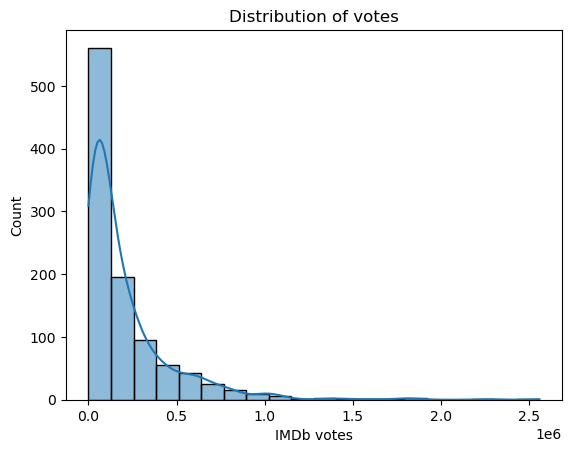

How many nulls in the votes column for each genre: 
imdb_genre
Adventure      0
Comedy         5
Drama          2
Horror         2
Sci-Fi         0
Thriller       0
unknown      343
Name: votes, dtype: int64
How many not nulls in the imdb_rating column for each genre: 
imdb_genre
Adventure     66
Comedy       377
Drama        321
Horror       138
Sci-Fi        42
Thriller      71
unknown        0
Name: votes, dtype: int64
After filling, now checking how many nulls in the votes column for each genre: 
imdb_genre
Adventure    0
Comedy       0
Drama        0
Horror       0
Sci-Fi       0
Thriller     0
unknown      0
Name: votes, dtype: int64
------------------------------------null values in df after filling the null positions of votes----------------------------------
checking imbd votes missing values after filling nulls:  0


In [9]:
print("----------------------------------------Work on votes column---------------------------------------------------")
#check how many missing values
print('votes column missing values in total: ', df['votes'].isnull().sum())


# Calculate the percentage of null values
null_percentage = df['votes'].isnull().sum() / len(df) * 100
print(f"Percentage of null values in votes: {null_percentage:.2f}%")

'''
# View rows where 'votes' is null
null_col1 = df[df['votes'].isnull()]
#print the rows containing votes are null
print("The rows where votes are not defined: ", null_col1)
'''
#check the summary of statistics
print('summary of statistics: ', df['votes'].describe(), sep = '\n')


sns.histplot(df['votes'], bins=20, kde=True)
plt.title('Distribution of votes')
plt.xlabel('IMDb votes')
plt.ylabel('Count')
plt.show()


# checking how many nulls each genre has
print('How many nulls in the votes column for each genre: ', df.groupby('imdb_genre')['votes'].apply(lambda x: x.isnull().sum()), sep = '\n')

# checking how many nulls each genre has
print('How many not nulls in the imdb_rating column for each genre: ', df.groupby('imdb_genre')['votes'].apply(lambda x: x.notnull().sum()), sep = '\n')

#filling the missing data with the median value based on every genre. 
df['votes'] = df.groupby('imdb_genre')['votes'].transform(
    lambda x: x.fillna(x.median()))

# some imdb_genre are filled with unknown before and for those genre, votes are missing also, so for this genre median value can not be calculated. filling those with global median value
df['votes'] = df['votes'].fillna(df['votes'].median())

# After filling, now checking how many nulls each genre has
print('After filling, now checking how many nulls in the votes column for each genre: ', df.groupby('imdb_genre')['votes'].apply(lambda x: x.isnull().sum()), sep = '\n')

print("------------------------------------null values in df after filling the null positions of votes----------------------------------")
print('checking imbd votes missing values after filling nulls: ', df['votes'].isnull().sum())



----------------------------------------Work on box_office_collection column---------------------------------------------------
check box_office_collection missing values:  405
Percentage of null values in box_office_collection: 29.63%
summary of statistics: 
count    9.620000e+02
mean     1.454361e+08
std      2.416530e+08
min      3.809000e+04
25%      8.824206e+06
50%      4.645726e+07
75%      1.672740e+08
max      2.797801e+09
Name: box_office_collection, dtype: float64


C:\Users\rubay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


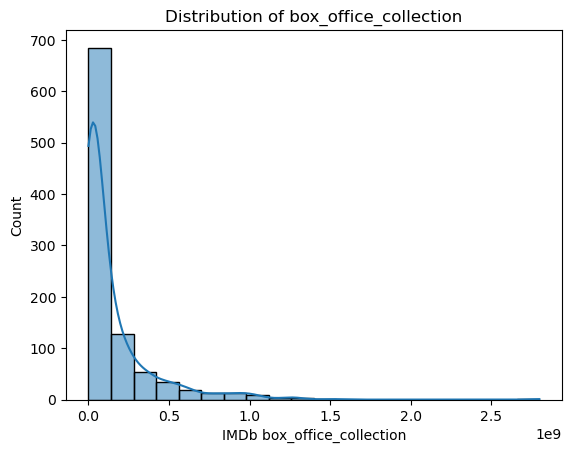

How many nulls in the box_office_collection column for each genre: 
imdb_genre
Adventure     21
Comedy        55
Drama         58
Horror        45
Sci-Fi         5
Thriller      21
unknown      200
Name: box_office_collection, dtype: int64
How many not nulls in the box_office_collection column for each genre: 
imdb_genre
Adventure     45
Comedy       327
Drama        265
Horror        95
Sci-Fi        37
Thriller      50
unknown      143
Name: box_office_collection, dtype: int64
After filling, now checking how many nulls in the box_office_collection column for each genre: 
imdb_genre
Adventure    0
Comedy       0
Drama        0
Horror       0
Sci-Fi       0
Thriller     0
unknown      0
Name: box_office_collection, dtype: int64
------------------------------------null values in df after filling the null positions of box_office_collection----------------------------------
check box_office_collection missing values:  0


In [10]:
print("----------------------------------------Work on box_office_collection column---------------------------------------------------")
#check missing values
print('check box_office_collection missing values: ', df['box_office_collection'].isnull().sum())

# Calculate the percentage of null values
null_percentage = df['box_office_collection'].isnull().sum() / len(df) * 100
print(f"Percentage of null values in box_office_collection: {null_percentage:.2f}%")

#check the summary of statistics
print('summary of statistics: ', df['box_office_collection'].describe(), sep = '\n')


sns.histplot(df['box_office_collection'], bins=20, kde=True)
plt.title('Distribution of box_office_collection')
plt.xlabel('IMDb box_office_collection')
plt.ylabel('Count')
plt.show()


# checking how many nulls each genre has
print('How many nulls in the box_office_collection column for each genre: ', df.groupby('imdb_genre')['box_office_collection'].apply(lambda x: x.isnull().sum()), sep = '\n')

# checking how many nulls each genre has
print('How many not nulls in the box_office_collection column for each genre: ', df.groupby('imdb_genre')['box_office_collection'].apply(lambda x: x.notnull().sum()), sep = '\n')

#filling the missing data with the median value based on every genre.
df['box_office_collection'] = df.groupby('imdb_genre')['box_office_collection'].transform(
    lambda x: x.fillna(x.median()))

# After filling, now checking how many nulls each genre has
print('After filling, now checking how many nulls in the box_office_collection column for each genre: ', df.groupby('imdb_genre')['box_office_collection'].apply(lambda x: x.isnull().sum()), sep = '\n')

print("------------------------------------null values in df after filling the null positions of box_office_collection----------------------------------")
print('check box_office_collection missing values: ', df['box_office_collection'].isnull().sum())


---------------------------------Work on imdb_rating------------------------------
check imdb rating missing values:  352
Percentage of null values in imdb_rating: 25.75%
summary of statistics: 
count    1015.000000
mean        7.086502
std         0.898369
min         2.100000
25%         6.700000
50%         7.200000
75%         7.700000
max         9.000000
Name: imdb_rating, dtype: float64


C:\Users\rubay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


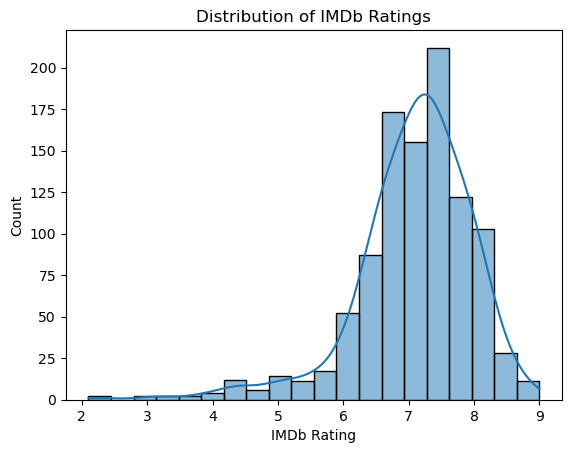

How many nulls in the imdb_rating column for each genre: 
imdb_genre
Adventure      0
Comedy         5
Drama          2
Horror         2
Sci-Fi         0
Thriller       0
unknown      343
Name: imdb_rating, dtype: int64
How many not nulls in the imdb_rating column for each genre: 
imdb_genre
Adventure     66
Comedy       377
Drama        321
Horror       138
Sci-Fi        42
Thriller      71
unknown        0
Name: imdb_rating, dtype: int64

 After filling, now checking how many nulls in the imdb_rating column for each genre: 
imdb_genre
Adventure    0
Comedy       0
Drama        0
Horror       0
Sci-Fi       0
Thriller     0
unknown      0
Name: imdb_rating, dtype: int64

 checking imdb_rating missing values after filling nulls:  0


'\nnull_col1 = df[df[\'imdb_rating\'].isnull()]\n#print the rows containing cast are null\nprint("The rows where imdb_rating are not defined: ", null_col1)\n'

In [11]:
print("---------------------------------Work on imdb_rating------------------------------")

#check missing values
print('check imdb rating missing values: ', df['imdb_rating'].isnull().sum())

# Calculate the percentage of null values
null_percentage = df['imdb_rating'].isnull().sum() / len(df) * 100
print(f"Percentage of null values in imdb_rating: {null_percentage:.2f}%")

#check the summary of statistics
print('summary of statistics: ', df['imdb_rating'].describe(), sep = '\n')

sns.histplot(df['imdb_rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

# checking how many nulls each genre has
print('How many nulls in the imdb_rating column for each genre: ', df.groupby('imdb_genre')['imdb_rating'].apply(lambda x: x.isnull().sum()), sep = '\n')

# checking how many nulls each genre has
print('How many not nulls in the imdb_rating column for each genre: ', df.groupby('imdb_genre')['imdb_rating'].apply(lambda x: x.notnull().sum()), sep = '\n')

#filling the missing data with the median value based on every genre. 
df['imdb_rating'] = df.groupby('imdb_genre')['imdb_rating'].transform(
    lambda x: x.fillna(x.median()))
# some imdb_genre are filled with unknown before, so for this genre median value can not be calculated. so, filling those with global median value
df['imdb_rating'] = df['imdb_rating'].fillna(df['imdb_rating'].median())


# After filling, now checking how many nulls each genre has
print('\n After filling, now checking how many nulls in the imdb_rating column for each genre: ', df.groupby('imdb_genre')['imdb_rating'].apply(lambda x: x.isnull().sum()), sep = '\n')


print('\n checking imdb_rating missing values after filling nulls: ', df['imdb_rating'].isnull().sum())

'''
null_col1 = df[df['imdb_rating'].isnull()]
#print the rows containing cast are null
print("The rows where imdb_rating are not defined: ", null_col1)
'''

---------------------------------Work on metascore------------------------------
check imdb metascore missing values:  441
Percentage of null values in metascore: 32.26%
summary of statistics: 
count    926.000000
mean      68.752700
std       16.176071
min        9.000000
25%       61.000000
50%       70.000000
75%       80.000000
max      100.000000
Name: metascore, dtype: float64


C:\Users\rubay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


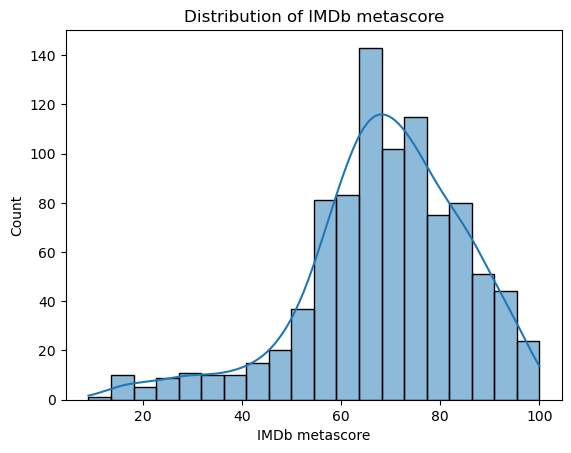

How many nulls in the metascore column for each genre: 
imdb_genre
Adventure      7
Comedy        28
Drama         33
Horror        17
Sci-Fi         5
Thriller       8
unknown      343
Name: metascore, dtype: int64
How many not nulls in the metascore column for each genre: 
imdb_genre
Adventure     59
Comedy       354
Drama        290
Horror       123
Sci-Fi        37
Thriller      63
unknown        0
Name: metascore, dtype: int64
After filling, now checking how many nulls in the metascore column for each genre: 
imdb_genre
Adventure    0
Comedy       0
Drama        0
Horror       0
Sci-Fi       0
Thriller     0
unknown      0
Name: metascore, dtype: int64
------------------------------------null values in df after filling the null positions of metascore----------------------------------
checking metascore missing values after filling nulls:  0


In [12]:
print("---------------------------------Work on metascore------------------------------")

#check missing values
print('check imdb metascore missing values: ', df['metascore'].isnull().sum())

# Calculate the percentage of null values
null_percentage = df['metascore'].isnull().sum() / len(df) * 100
print(f"Percentage of null values in metascore: {null_percentage:.2f}%")

#check the summary of statistics
print('summary of statistics: ', df['metascore'].describe(), sep = '\n')

sns.histplot(df['metascore'], bins=20, kde=True)
plt.title('Distribution of IMDb metascore')
plt.xlabel('IMDb metascore')
plt.ylabel('Count')
plt.show()

# checking how many nulls each genre has
print('How many nulls in the metascore column for each genre: ', df.groupby('imdb_genre')['metascore'].apply(lambda x: x.isnull().sum()), sep = '\n')

# checking how many nulls each genre has
print('How many not nulls in the metascore column for each genre: ', df.groupby('imdb_genre')['metascore'].apply(lambda x: x.notnull().sum()), sep = '\n')

#filling the missing data with the median value based on every genre. 
df['metascore'] = df.groupby('imdb_genre')['metascore'].transform(
    lambda x: x.fillna(x.median()))
# some imdb_genre are filled with unknown before, so for this genre median value can not be calculated. so, filling those with global median value
df['metascore'] = df['metascore'].fillna(df['metascore'].median())

# After filling, now checking how many nulls each genre has
print('After filling, now checking how many nulls in the metascore column for each genre: ', df.groupby('imdb_genre')['metascore'].apply(lambda x: x.isnull().sum()), sep = '\n')


print("------------------------------------null values in df after filling the null positions of metascore----------------------------------")
print('checking metascore missing values after filling nulls: ', df['metascore'].isnull().sum())

In [13]:
print('\n\n-------------------------------info after cleaning-------------------------------\n')
#print info about df
print("------------------------------------info about df----------------------------------")
print(df.info())
print("------------------------------------null values in df----------------------------------")
print(df.isnull().sum())



-------------------------------info after cleaning-------------------------------

------------------------------------info about df----------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1367 entries, 0 to 1376
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie                  1367 non-null   object 
 1   year                   1367 non-null   int64  
 2   score                  1367 non-null   int64  
 3   adjusted_score         1367 non-null   float64
 4   director               1367 non-null   object 
 5   cast                   1367 non-null   object 
 6   consensus              1367 non-null   object 
 7   box_office_collection  1367 non-null   float64
 8   imdb_genre             1367 non-null   object 
 9   imdb_rating            1367 non-null   float64
 10  metascore              1367 non-null   float64
 11  time_minute            1367 non-null   float64
 

In [14]:
#save the cleaned data into a csv file
df.to_csv('BoxOfficeCollections_cleaned.csv', index=False)

#find the saved location of csv
import os
print(os.getcwd())

# Load it back
df_cleaned = pd.read_csv('BoxOfficeCollections_cleaned.csv')
df_cleaned.head()

C:\Users\rubay


,movie,year,score,adjusted_score,director,cast,consensus,box_office_collection,imdb_genre,imdb_rating,metascore,time_minute,votes
0,Hot Rod,2007,39,42.918,Akiva Schaffer,"Andy Samberg, Jorma Taccone, Bill Hader, Danny...","For Rod Kimball (Andy Samberg), performing stu...",14371564.0,Comedy,6.7,43.0,88.0,84956.0
1,Game Night,2018,85,99.838,John Francis Daley,"Jason Bateman, Rachel McAdams, Kyle Chandler, ...",Max and Annie's weekly game night gets kicked ...,117378084.0,Comedy,6.9,66.0,100.0,229292.0
2,The First Wives Club,1996,49,53.174,Hugh Wilson,"Goldie Hawn, Bette Midler, Diane Keaton, Maggi...",Despondent over the marriage of her ex-husband...,181489203.0,Comedy,6.4,58.0,103.0,48413.0
3,Scary Movie,2000,52,54.973,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...","Defying the very notion of good taste, Scary M...",277200000.0,Comedy,6.2,48.0,88.0,254927.0
4,Blockers,2018,84,96.883,Kay Cannon,"Leslie Mann, Ike Barinholtz, John Cena, Kathry...","Julie, Kayla and Sam are three high school sen...",94523781.0,Comedy,6.2,69.0,102.0,78498.0


In [1]:
import os
print(os.getcwd())


C:\Users\rubay
